<a href="https://colab.research.google.com/github/JECABRIFA/Diplomado_IA/blob/main/S6_C2_Modelo_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab. Machine Learning- Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os # leer patch ruta sde ecarpetas
# chdir: cambia la dirección
os.chdir('/content/drive/MyDrive/Carito/Capacitaciones/Curso ia 5feb025')

In [ ]:
os.listdir() # Lista de los documentos

['~WRL0003.tmp',
 '~$ase 1 semana1 5feb025.docx',
 'git-codigos.html',
 'ESTADISTICAS PERMISOS-INCAPACIDADESdic024 ia.xlsx',
 'Clase 1 semana1 5feb025.docx',
 'S3_C2_OperacionesStri.ipynb',
 'git-codigos_files',
 'marketing_extract_2X_Income (1).xlsx']

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income (1).xlsx')

ANÁLISIS DESCRIPTIVO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


In [ ]:
df.shape

(2216, 3)

In [ ]:
df.describe()

,MntMeatProducts,MntWines,Income
count,2216.000000,2216.000000,2216.000000
mean,166.995939,305.091606,52247.251354
std,224.283273,337.327920,25173.076661
min,0.000000,0.000000,1730.000000
25%,16.000000,24.000000,35303.000000
50%,68.000000,174.500000,51381.500000
75%,232.250000,505.000000,68522.000000
max,1725.000000,1493.000000,666666.000000


ANÁLISIS EXPLORATORIA

Text(0, 0.5, 'Income: Ingreso anual')

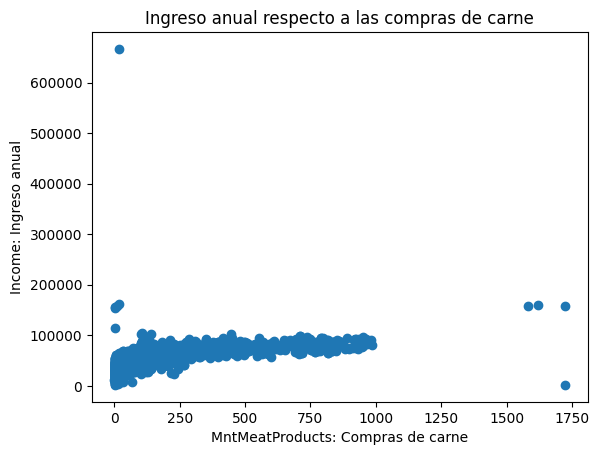

In [ ]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

ELIMINAR DATOS ATIPICOS VARIABLE X y y

> Añadir blockquote



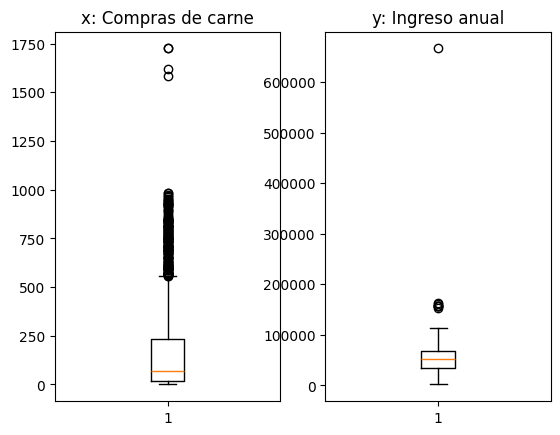

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(x)
plt.title('x: Compras de carne')
plt.subplot(1,2,2)
plt.boxplot(y)
plt.title('y: Ingreso anual')
plt.show()

In [ ]:
x_Q1 = x.quantile(0.25)
x_Q3 = x.quantile(0.75)
x_IQR = x_Q3 - x_Q1

In [ ]:
x_IQR

216.25

In [ ]:
y_Q1 = y.quantile(0.25)
y_Q3 = y.quantile(0.75)
y_IQR = y_Q3 - y_Q1

In [ ]:
df = df[(df['MntMeatProducts'] >= x_Q1 - 1.5*x_IQR) & (df['MntMeatProducts'] <= x_Q3 + 1.5*x_IQR)]
df = df[(df['Income'] >= y_Q1 - 1.5*y_IQR) & ( df['Income']<= y_Q3 + 1.5*y_IQR)]

In [ ]:
X.shape

(2042, 3)

In [ ]:
Y.shape

(2208, 3)

# DATOS LIMPIOS O PROCEDADOS

Text(0, 0.5, 'Income: Ingreso anual')

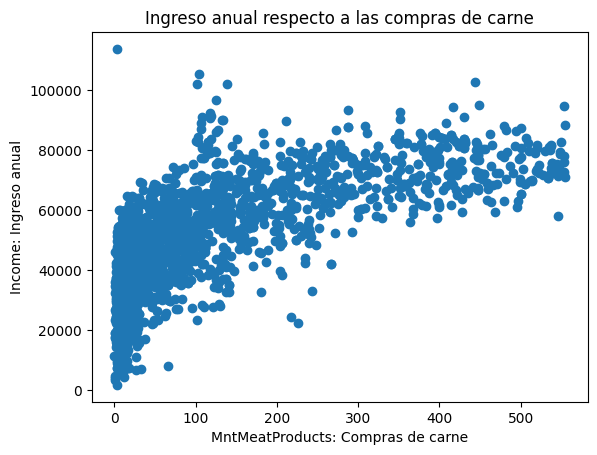

In [ ]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

MODELO DE MARCHI LERNING

# Entrenar el modelo de machine learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
# Paso 1 Definir el conjunto de entrenamiento
# Target : Objetivo es la variable  a predecir
# y: Income
y = df['Income']

# Carcaterísticas: atributos
x = df[['MntMeatProducts']]

In [ ]:
# Paso 2. Hacer la división de los conjuntos para entrenar (fit) y probar(test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2) # 80 train 20 test

In [ ]:
# Paso 3. Definir el modelo
modelo = LinearRegression()

In [ ]:
# Paso 4. Entrenar: es el proceso de ajuste para obtener el modelo
modelo.fit(x_train ,y_train)

LinearRegression()

In [ ]:
modelo.coef_

array([100.14059257])

GRAFICAR

In [ ]:
X_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Valores equidistantes
y_range = modelo.predict(X_range)  # Predicción para la línea recta

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


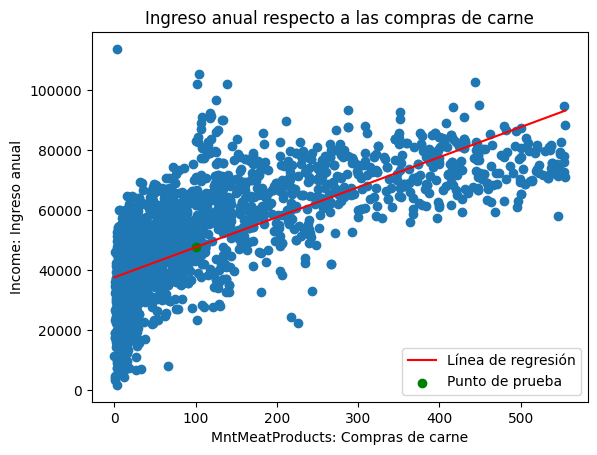

In [ ]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

plt.plot(X_range, y_range, color='red', label='Línea de regresión')
plt.legend()
# x cuento compra en carne y: cuanto ingreso en dinero

X_prueba = 100
y_predicha = modelo.predict([[X_prueba]])
plt.scatter(X_prueba, y_predicha,  color='green', label='Punto de prueba')
plt.legend()